<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


In [7]:
df["ConvertedComp"].info

<bound method Series.info of 0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64>

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\ps289\AppData\Local\Temp\ipykernel_26124\1298940588.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


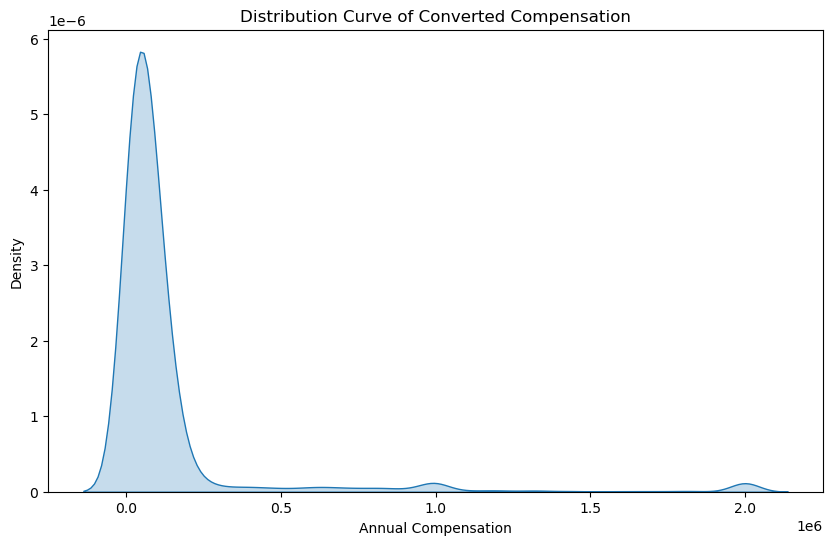

In [13]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)
plt.title('Distribution Curve of Converted Compensation')
plt.xlabel('Annual Compensation')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


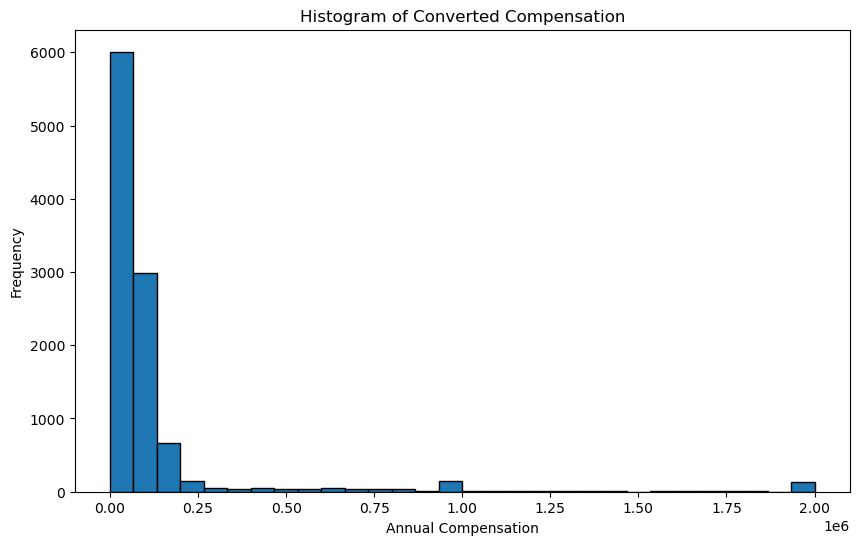

In [16]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='k')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Compensation')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [17]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [30]:
df["Gender"].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [24]:
# your code goes here
man_counts=df[df['Gender']=='Man'].shape[0]
man_counts

10480

d
Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [36]:
# your code goes here
df_Women = df[df["Gender"] == "Woman"][["Gender", "ConvertedComp"]]

print(df_Women)

df_Women["ConvertedComp"].dropna().median()

      Gender  ConvertedComp
30     Woman         4128.0
32     Woman        17491.0
38     Woman        16008.0
45     Woman       229016.0
68     Woman       135000.0
...      ...            ...
11310  Woman            NaN
11330  Woman        47628.0
11343  Woman       175000.0
11371  Woman       110000.0
11385  Woman        38760.0

[731 rows x 2 columns]


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [43]:
# your code goes here
df_age=df["Age"].sort_values()
mini=df_age.min()
q1=df_age.quantile(0.25)
median=df_age.median()
q2=df_age.quantile(0.75)
maxi=df_age.max()
print(mini,q1,median,q2,maxi)



16.0 25.0 29.0 35.0 99.0


Plot a histogram of the column `Age`.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram Of Ages')

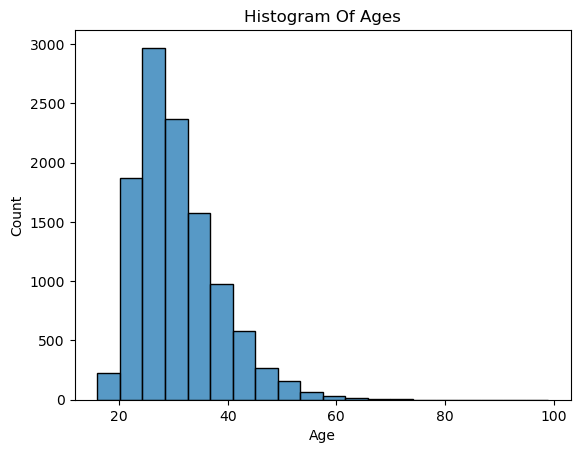

In [44]:
# your code goes here
sns.histplot(df,x="Age",bins=20)
plt.title("Histogram Of Ages")


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


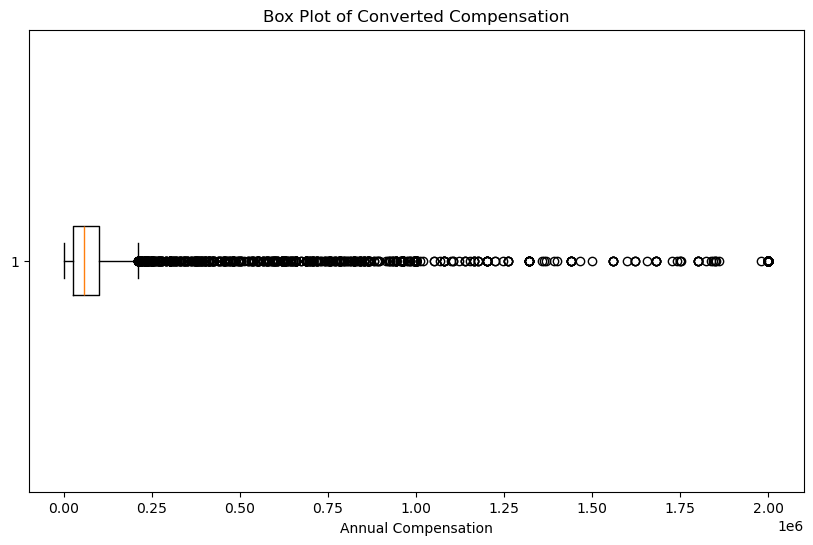

Interquartile Range (IQR): 73132.0
Lower Bound for Outliers: -82830.0
Upper Bound for Outliers: 209698.0
Number of Outliers: 879
Outliers 3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
           ...    
11296     840000.0
11303    1000000.0
11350     300000.0
11353     260000.0
11369     701196.0
Name: ConvertedComp, Length: 879, dtype: float64


TypeError: could not convert string to float: 'I am a developer by profession'

In [62]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Create a box plot for 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Annual Compensation')
plt.show()


Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


print("Interquartile Range (IQR):", IQR)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))
print("Outliers", outliers["ConvertedComp"])
df_no_outliers.median()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [64]:
# your code goes here
df_no_outliers["ConvertedComp"].median()

52704.0

Find out the upper and lower bounds.


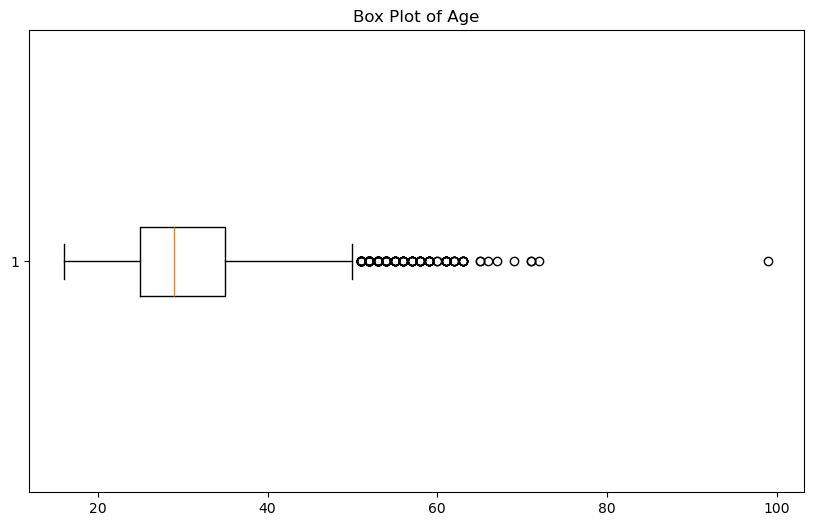

In [65]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Box Plot of Age')

plt.show()



Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here
df_1=df

## Correlation


### Finding correlation
um

Find the correlation between `Age` and all other numerical columns.


In [66]:

numerical_df = df.select_dtypes(include=['number'])

print(numerical_df.columns)
correlation_matrix = numerical_df.corr()


age_correlation = correlation_matrix['Age']
age_correlation



Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
